# **Introduction: Monte Carlo Portfolio and Probability Distributions Simulation**
### This program utilizes Monte Carlo simulations to model potential future outcomes for financial assets and real-world stochastic processes.
## **Part 1:** Simulates a $100,000 investment portfolio (Apple, Tesla, Microsoft) over one year (252 trading days) using Geometric Brownian Motion (GBM) to generate 10,000 future price paths.
## **Part 2:** Visualizes key probability distributions (Exponential, Poisson, Lognormal, Uniform, and Triangular) to analyze different stochastic processes, such as failure modeling, cyber attack frequencies, and investment returns.

# **Part 1**

# 1) **Monte Carlo Portfolio Risk Simulation with Risk Metrics:**
## Simulates a portfolio using correlated asset returns and evaluates its risk exposure by calculating Value at Risk (VaR) and Conditional Value at Risk (CVaR).

Sample Stock Prices (Last Day, First 5 Simulations):
[[ 93.84509428 132.66238606 128.70140925]
 [ 98.65562235  95.16645496  87.28179068]
 [ 97.20558225  77.15649605 115.19374945]
 [100.69576684 126.49878571  93.92332853]
 [106.17003532  87.32205186 110.0860505 ]]
Sample Portfolio Values (First 5 Simulations):
[115.9471763   94.19672263  96.58730655 106.40494101 101.69044484]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


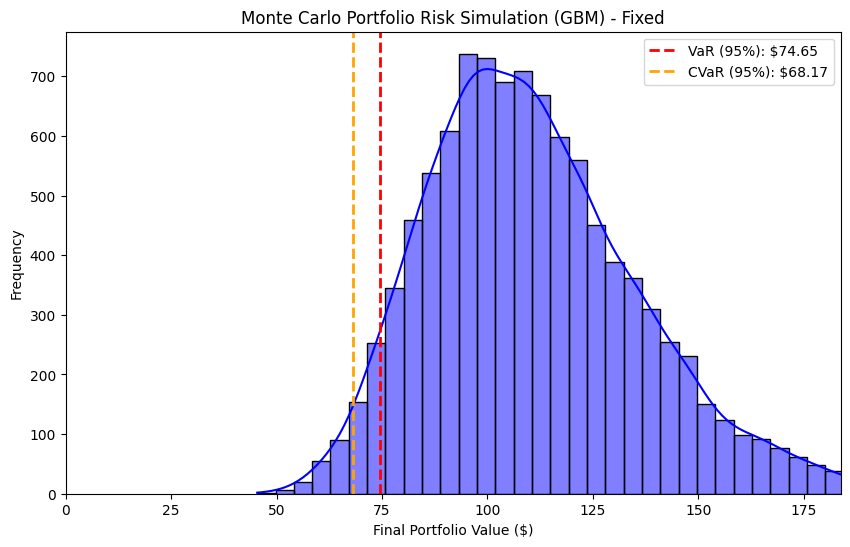

5% Value at Risk (VaR 95%): $74.65
5% Conditional Value at Risk (CVaR 95%): $68.17


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulation Parameters
np.random.seed(42)
num_simulations = 10000
days = 252  # One year of trading days

# Asset parameters: [Apple, Tesla, Microsoft]
mean_returns = np.array([0.08, 0.15, 0.10])  # Expected annual returns
volatility = np.array([0.20, 0.40, 0.25])  # Annual volatility

# Correlation matrix (historical correlation between assets)
correlation_matrix = np.array([
    [1.0, 0.6, 0.5],
    [0.6, 1.0, 0.4],
    [0.5, 0.4, 1.0]
])

# Compute covariance matrix from volatilities
cov_matrix = np.diag(volatility) @ correlation_matrix @ np.diag(volatility)

# Initial investment & portfolio weights
initial_investment = 100000  # $100,000
weights = np.array([0.4, 0.3, 0.3])  # Portfolio allocation

# 2. Monte Carlo Simulations with GBM for Stock Prices
stock_prices = np.zeros((num_simulations, days, len(mean_returns)))
stock_prices[:, 0, :] = 100  # Initial stock price for all assets

for i in range(1, days):
    Z = np.random.multivariate_normal(np.zeros(len(mean_returns)), correlation_matrix, num_simulations)
    stock_prices[:, i, :] = stock_prices[:, i-1, :] * np.exp(
        (mean_returns - 0.5 * volatility**2) * (1/days) + volatility * np.sqrt(1/days) * Z
    )

# 3. Compute final portfolio value (weighted sum of last-day stock prices)
final_portfolio_value = np.sum(stock_prices[:, -1, :] * weights, axis=1)

# Debugging: Print sample stock prices & portfolio values
print("Sample Stock Prices (Last Day, First 5 Simulations):")
print(stock_prices[:5, -1, :])
print("Sample Portfolio Values (First 5 Simulations):")
print(final_portfolio_value[:5])

# Ensure no negative values
final_portfolio_value = np.maximum(final_portfolio_value, 0)

# 4. Risk Metrics: Value at Risk (VaR) & Conditional Value at Risk (CVaR)
var_95 = np.percentile(final_portfolio_value, 5)  # 95% Value at Risk
cvar_95 = final_portfolio_value[final_portfolio_value <= var_95].mean()  # CVaR

# 5. Plot Portfolio Value Distribution with Fixed Scale
plt.figure(figsize=(10,6))
sns.histplot(final_portfolio_value, bins=50, kde=True, color="blue")
plt.axvline(var_95, color="red", linestyle="dashed", linewidth=2, label=f"VaR (95%): ${var_95:.2f}")
plt.axvline(cvar_95, color="orange", linestyle="dashed", linewidth=2, label=f"CVaR (95%): ${cvar_95:.2f}")
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Portfolio Risk Simulation (GBM) - Fixed")
plt.legend()
plt.xlim(0, np.percentile(final_portfolio_value, 99))  # Focus on realistic range
plt.show()

# 6. Print Risk Metrics
print(f"5% Value at Risk (VaR 95%): ${var_95:.2f}")
print(f"5% Conditional Value at Risk (CVaR 95%): ${cvar_95:.2f}")


# 2) **Monte Carlo Stock Price Simulation (GBM):**
## Generates and visualizes potential stock price paths using Geometric Brownian Motion (GBM) to model future price movements.

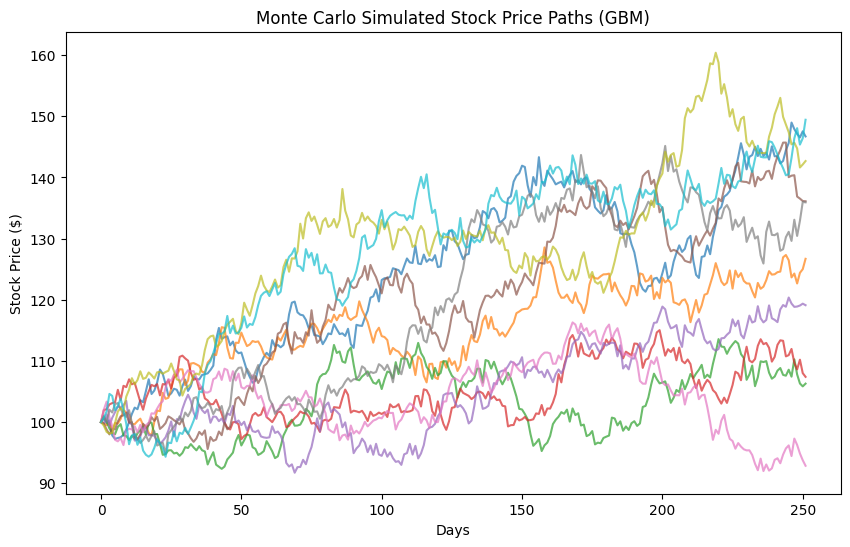

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation Parameters
np.random.seed(42)
S0 = 100  # Initial stock price
mu = 0.07  # Expected return (7% annual)
sigma = 0.20  # Volatility (20% annual)
T = 1  # 1 year
dt = 1/252  # Daily steps
num_simulations = 10000
num_days = int(T / dt)

# 2. Generate Stock Paths Using GBM
stock_paths = np.zeros((num_simulations, num_days))
stock_paths[:, 0] = S0

for i in range(1, num_days):
    Z = np.random.normal(0, 1, num_simulations)
    stock_paths[:, i] = stock_paths[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# 3. Plot Sample Stock Paths
plt.figure(figsize=(10,6))
plt.plot(stock_paths[:10, :].T, alpha=0.7)  # Plot 10 sample paths
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
plt.title("Monte Carlo Simulated Stock Price Paths (GBM)")
plt.show()

# 3) **Monte Carlo Portfolio Simulation with Option Pricing:**
## Extends the portfolio simulation by pricing a European call option, using the simulated portfolio values to determine option payoffs and setting the strike price at the median portfolio value.

Sample Final Stock Prices (First 5 Simulations):
[[ 93.84509428 132.66238606 128.70140925]
 [ 98.65562235  95.16645496  87.28179068]
 [ 97.20558225  77.15649605 115.19374945]
 [100.69576684 126.49878571  93.92332853]
 [106.17003532  87.32205186 110.0860505 ]]
Sample Final Portfolio Values (First 5 Simulations):
[115.9471763   94.19672263  96.58730655 106.40494101 101.69044484]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


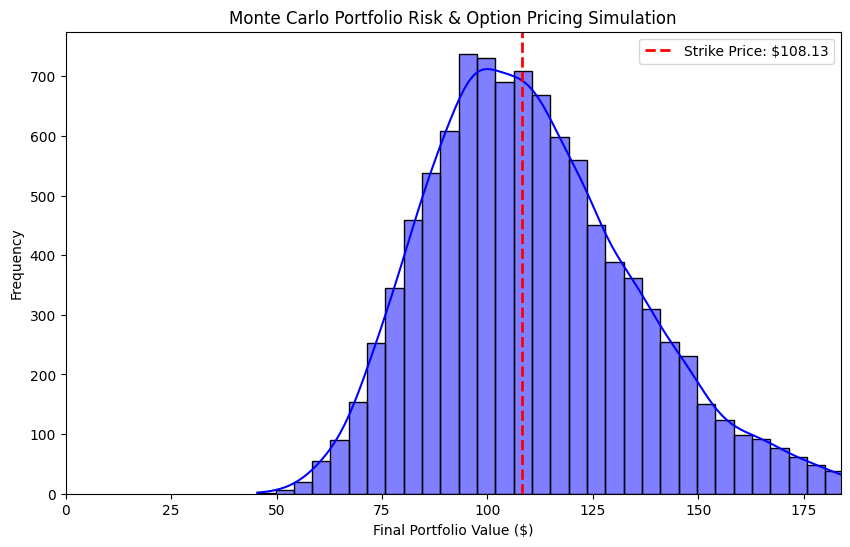

Monte Carlo Estimated Call Option Price: $11.30
5% Value at Risk (VaR 95%): $74.65
5% Conditional Value at Risk (CVaR 95%): $68.17


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulation Parameters
np.random.seed(42)
num_simulations = 10000
days = 252  # One year of trading days

# Asset parameters: [Apple, Tesla, Microsoft]
mean_returns = np.array([0.08, 0.15, 0.10])  # Expected annual returns
volatility = np.array([0.20, 0.40, 0.25])  # Annual volatility

# Correlation matrix (historical correlation between assets)
correlation_matrix = np.array([
    [1.0, 0.6, 0.5],
    [0.6, 1.0, 0.4],
    [0.5, 0.4, 1.0]
])

# Compute covariance matrix from volatilities
cov_matrix = np.diag(volatility) @ correlation_matrix @ np.diag(volatility)

# Initial investment & portfolio weights
initial_investment = 100000  # $100,000
weights = np.array([0.4, 0.3, 0.3])  # Portfolio allocation

# 2. Monte Carlo Simulations with GBM for Stock Prices
stock_prices = np.zeros((num_simulations, days, len(mean_returns)))
stock_prices[:, 0, :] = 100  # Initial stock price for all assets

for i in range(1, days):
    Z = np.random.multivariate_normal(np.zeros(len(mean_returns)), correlation_matrix, num_simulations)
    stock_prices[:, i, :] = stock_prices[:, i-1, :] * np.exp((mean_returns - 0.5 * volatility**2) * (1/days) + volatility * np.sqrt(1/days) * Z)

# Compute final portfolio value (weighted sum of last-day stock prices)
final_portfolio_value = np.sum(stock_prices[:, -1, :] * weights, axis=1)

# Debugging: Print sample stock prices & portfolio values
print("Sample Final Stock Prices (First 5 Simulations):")
print(stock_prices[:5, -1, :])
print("Sample Final Portfolio Values (First 5 Simulations):")
print(final_portfolio_value[:5])

# 3. Risk Metrics: Value at Risk (VaR) & Conditional Value at Risk (CVaR)
var_95 = np.percentile(final_portfolio_value, 5)  # 95% Value at Risk
cvar_95 = final_portfolio_value[final_portfolio_value <= var_95].mean()  # CVaR

# 4. Compute Option Pricing on the Portfolio
r = 0.03  # Risk-free rate (3%)
K = np.percentile(final_portfolio_value, 50)  # Strike price set at median portfolio value

# Compute option payoff
option_payoffs = np.maximum(final_portfolio_value - K, 0)  # European call option payoff

# Compute present value (discounted payoff)
option_price = np.exp(-r * (days/252)) * np.mean(option_payoffs)

# 5. Plot Portfolio Value Distribution with Fixed Scale
plt.figure(figsize=(10,6))
sns.histplot(final_portfolio_value, bins=50, kde=True, kde_kws={"bw_adjust": 1.5}, color="blue")
plt.axvline(K, color="red", linestyle="dashed", linewidth=2, label=f"Strike Price: ${K:.2f}")
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Portfolio Risk & Option Pricing Simulation")
plt.legend()
plt.xlim(50, np.percentile(final_portfolio_value, 99))  # Focus on realistic range
plt.show()

# 6. Print Risk Metrics & Option Price
print(f"Monte Carlo Estimated Call Option Price: ${option_price:.2f}")
print(f"5% Value at Risk (VaR 95%): ${var_95:.2f}")
print(f"5% Conditional Value at Risk (CVaR 95%): ${cvar_95:.2f}")

# 4) **Monte Carlo Portfolio Simulation with Performance Metrics:**
## Evaluates the portfolio’s risk-adjusted performance by calculating annualized return, volatility, Sharpe ratio, and Value at Risk (VaR).


In [12]:
# 1. Compute Returns
daily_returns = stock_paths[:, 1:] / stock_paths[:, :-1] - 1
annualized_return = np.mean(daily_returns) * 252
annualized_volatility = np.std(daily_returns) * np.sqrt(252)

# 2. Compute Sharpe Ratio
risk_free_rate = 0.03
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# 3. Compute 95% Value at Risk (VaR)
var_95 = np.percentile(final_prices, 5)

# 4. Print Results
print(f"Annualized Return: {annualized_return*100:.2f}%")
print(f"Annualized Volatility: {annualized_volatility*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Value at Risk (VaR 95%): ${var_95:.2f}")

Annualized Return: 6.85%
Annualized Volatility: 20.02%
Sharpe Ratio: 0.19
Value at Risk (VaR 95%): $75.60


# **Part 2**

# **Main Distributions**
## All simulations model a $10,000 investment over multiple scenarios using 10,000 simulations to estimate possible portfolio outcomes. Each distribution serves a different purpose in financial modeling.

# 1) **Normal Distribution:** Short-term stock returns, risk modeling
## Assumes returns can be positive or negative, making it useful for short-term market fluctuations and risk assessment in volatile conditions.

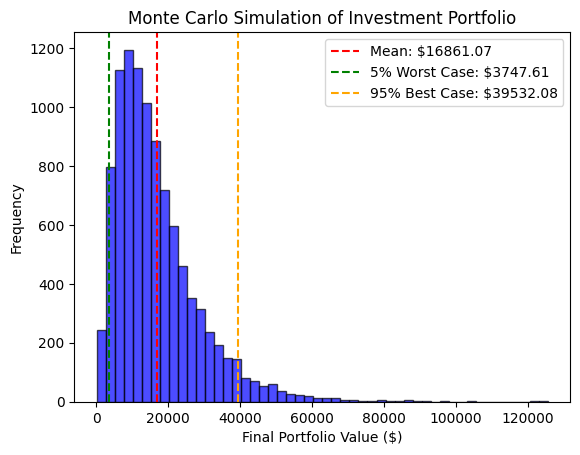

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation Parameters
np.random.seed(42)
num_simulations = 10000
initial_investment = 10000  # $10,000
expected_return = 0.07  # 7% mean return
volatility = 0.15  # 15% standard deviation (risk)
years = 5

# 2. Monte Carlo Simulation
simulated_returns = np.random.normal(expected_return, volatility, num_simulations)
final_values = initial_investment * (1 + simulated_returns) ** years

# 3. Results Analysis
mean_value = np.mean(final_values)
percentile_5 = np.percentile(final_values, 5)  # Worst-case scenario
percentile_95 = np.percentile(final_values, 95)  # Best-case scenario

# 4. Plot Results
plt.hist(final_values, bins=50, alpha=0.7, color="blue", edgecolor="black")
plt.axvline(mean_value, color="red", linestyle="dashed", label=f"Mean: ${mean_value:.2f}")
plt.axvline(percentile_5, color="green", linestyle="dashed", label=f"5% Worst Case: ${percentile_5:.2f}")
plt.axvline(percentile_95, color="orange", linestyle="dashed", label=f"95% Best Case: ${percentile_95:.2f}")
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation of Investment Portfolio")
plt.legend()
plt.show()


# 2) **Lognormal Distribution:** Portfolio values, investment returns, long-term modeling
## Ensures only positive returns, making it better for long-term investment growth modeling where compounding effects play a key role.

Sample Simulated Returns (First 10): [1.14254373 1.03874199 1.16871316 1.33269669 1.02390832 1.02391084
 1.34397538 1.18989517 0.98839669 1.15042795]
Sample Final Portfolio Values (First 10): [11425.43734784 10387.41988814 11687.13160522 13326.96693386
 10239.0832249  10239.10844038 13439.75378448 11898.95168295
  9883.96685878 11504.27953395]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


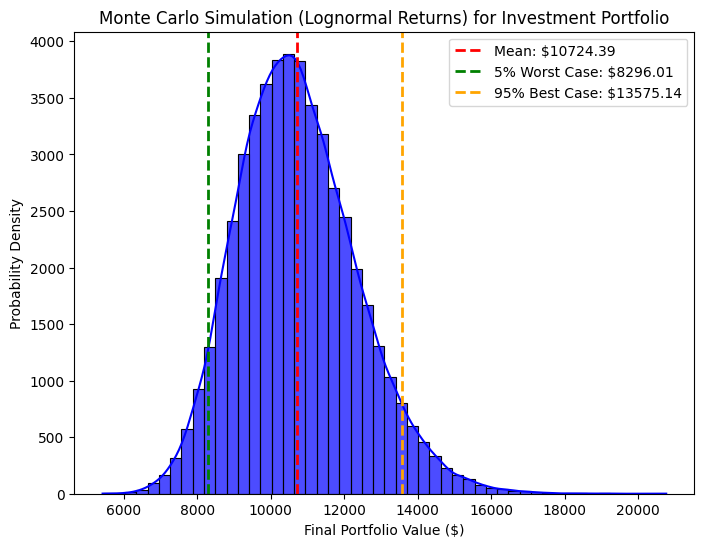

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulation Parameters
np.random.seed(42)
num_simulations = 50000  # Increased simulations for better smoothing
initial_investment = 10000

# Lognormal parameters: mean and volatility
mean_return = 0.07  # 7% expected return
volatility = 0.15  # 15% annual volatility
mu = mean_return - (0.5 * volatility ** 2)  # Adjusted mean for lognormal
sigma = volatility  # Lognormal standard deviation

# Simulate lognormal returns
simulated_returns = np.random.lognormal(mu, sigma, num_simulations)

# Compute final portfolio values
final_values = initial_investment * simulated_returns

# Debugging: Print sample values
print("Sample Simulated Returns (First 10):", simulated_returns[:10])
print("Sample Final Portfolio Values (First 10):", final_values[:10])

# 2. Plot the Lognormal Distribution with KDE
plt.figure(figsize=(8, 6))
sns.histplot(final_values, bins=50, kde=True, color="blue", edgecolor="black", alpha=0.7)
mean_value = np.mean(final_values)
percentile_5 = np.percentile(final_values, 5)  # Worst-case scenario
percentile_95 = np.percentile(final_values, 95)  # Best-case scenario

# Add markers for mean, worst-case, and best-case
plt.axvline(mean_value, color="red", linestyle="dashed", linewidth=2, label=f"Mean: ${mean_value:.2f}")
plt.axvline(percentile_5, color="green", linestyle="dashed", linewidth=2, label=f"5% Worst Case: ${percentile_5:.2f}")
plt.axvline(percentile_95, color="orange", linestyle="dashed", linewidth=2, label=f"95% Best Case: ${percentile_95:.2f}")

# Add labels and title
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Probability Density")
plt.title("Monte Carlo Simulation (Lognormal Returns) for Investment Portfolio")
plt.legend()
plt.show()

# 3) **Uniform Distribution:** Equal likelihood events, unknown risks
## Assigns equal probability to all returns within a fixed range, making it useful for scenarios with unknown risks or when no historical data favors a specific distribution.

Sample Simulated Returns (First 10): [ 0.01236204  0.18521429  0.11959818  0.07959755 -0.05319441 -0.05320164
 -0.08257492  0.15985284  0.0803345   0.11242177]
Sample Final Portfolio Values (First 10): [10123.62035654 11852.14291923 11195.98182543 10795.97545259
  9468.05592133  9467.98356101  9174.2508365  11598.52843732
 10803.34503523 11124.21773339]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


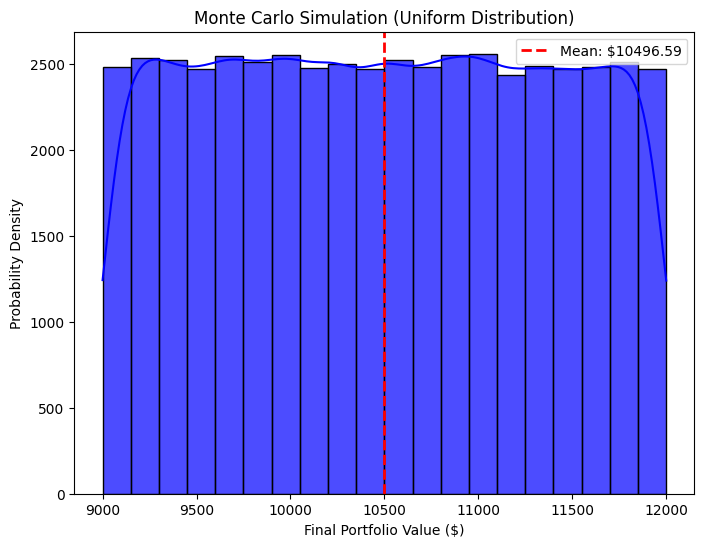

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulation Parameters
np.random.seed(42)
num_simulations = 50000  # Increased simulations for better smoothing
initial_investment = 10000

# Random returns uniformly between -10% and +20%
simulated_returns = np.random.uniform(-0.10, 0.20, num_simulations)

# Compute final portfolio values
final_values = initial_investment * (1 + simulated_returns)

# Debugging: Print sample values
print("Sample Simulated Returns (First 10):", simulated_returns[:10])
print("Sample Final Portfolio Values (First 10):", final_values[:10])

# 2. Plot the Uniform Distribution Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(final_values, bins=20, color="blue", edgecolor="black", alpha=0.7, kde=True)  # Reduced bins and added KDE
plt.axvline(np.mean(final_values), color="red", linestyle="dashed", linewidth=2, label=f"Mean: ${np.mean(final_values):.2f}")
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Probability Density")
plt.title("Monte Carlo Simulation (Uniform Distribution)")
plt.legend()
plt.show()

> 

# 4) **Triangular Distribution:** Project costs, realistic risk estimates
## Assumes returns follow a defined range with a most likely outcome, making it useful for realistic financial modeling where certain return values are more probable than others, such as business forecasts or market trends.

Sample Simulated Returns (First 10): [ 0.03820834  0.15615776  0.09776382  0.07489077 -0.01079826 -0.01080515
 -0.04557331  0.12775645  0.07527424  0.09329869]
Sample Final Portfolio Values (First 10): [10382.08342951 11561.57759523 10977.63821133 10748.90771258
  9892.01741365  9891.94845911  9544.26686658 11277.56451397
 10752.74242668 10932.98690421]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


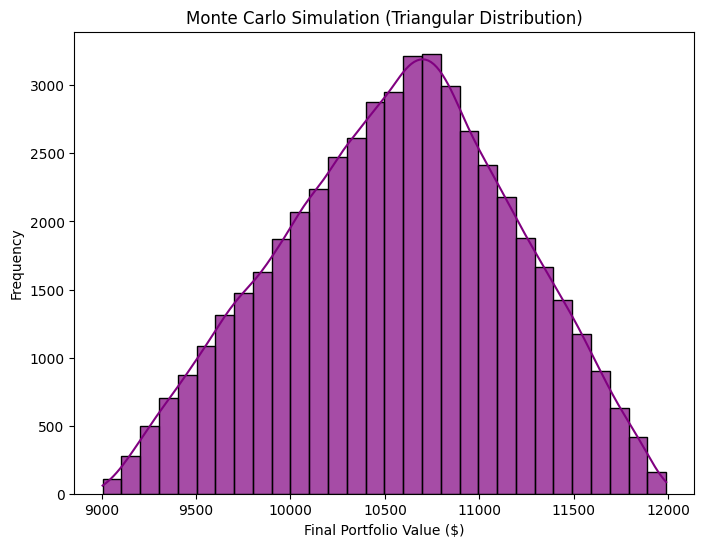

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulation Parameters
np.random.seed(42)
num_simulations = 50000  # Increased simulations for better smoothing
initial_investment = 10000

# Min = -10%, Most Likely = 7%, Max = 20%
min_return, mode_return, max_return = -0.10, 0.07, 0.20
c = (mode_return - min_return) / (max_return - min_return)

# Simulate triangular returns
simulated_returns = np.random.triangular(min_return, mode_return, max_return, num_simulations)

# Compute final portfolio values
final_values = initial_investment * (1 + simulated_returns)

# Debugging: Print sample values
print("Sample Simulated Returns (First 10):", simulated_returns[:10])
print("Sample Final Portfolio Values (First 10):", final_values[:10])

# 2. Plot the Triangular Distribution with KDE
plt.figure(figsize=(8, 6))
sns.histplot(final_values, bins=30, kde=True, color="purple", edgecolor="black", alpha=0.7)  # Reduced bins and added KDE
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation (Triangular Distribution)")
plt.show()

# 5) **Exponential Distribution:** Failures, rare events, system downtimes
## Models time until failure or rare events, making it useful for risk assessment, system failures, and operational reliability analysis. It is often applied to predict the time between market crashes, equipment failures, or major financial downturns.

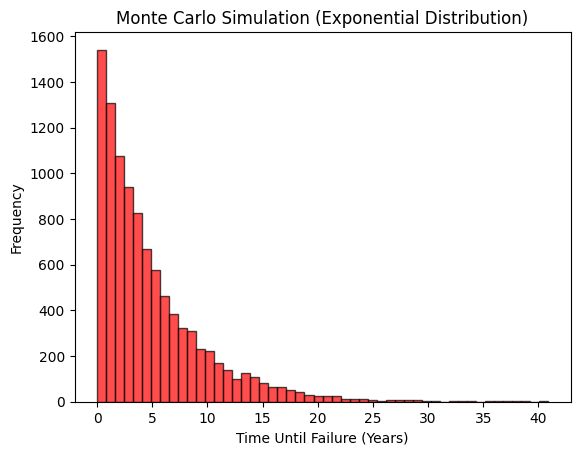

In [7]:
from scipy.stats import expon

np.random.seed(42)
num_simulations = 10000
failure_rate = 1 / 5  # Failure occurs every 5 years on average

simulated_failures = expon.rvs(scale=1/failure_rate, size=num_simulations)

plt.hist(simulated_failures, bins=50, color="red", edgecolor="black", alpha=0.7)
plt.title("Monte Carlo Simulation (Exponential Distribution)")
plt.xlabel("Time Until Failure (Years)")
plt.ylabel("Frequency")
plt.show()


# 6) **Poisson Distribution:** Counting risk events per time period
## Models the number of rare events in a fixed time period, making it useful for counting risk-related occurrences such as cyberattacks, fraud cases, market crashes, or system failures per year. It helps assess the likelihood of multiple events happening within a given timeframe.

Sample Poisson Simulated Attacks (First 10): [4 1 3 3 2 3 2 3 0 2]


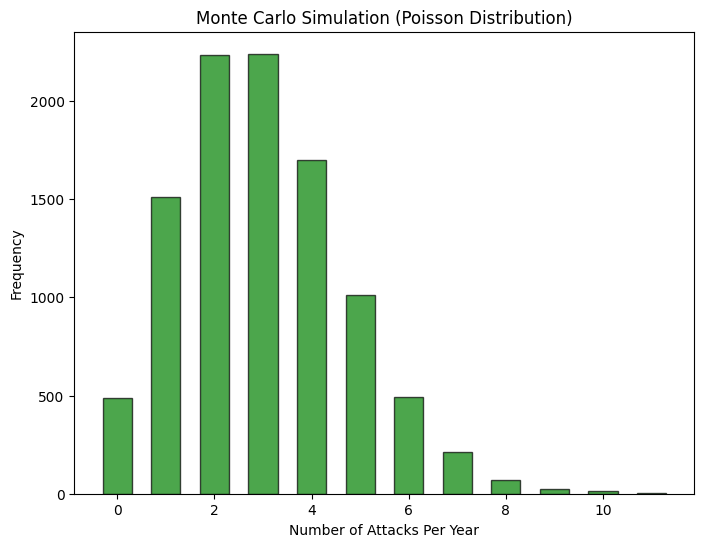

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation Parameters
np.random.seed(42)
num_simulations = 10000
lambda_value = 3  # Expect 3 cyber attacks per year

# Simulate Poisson-distributed number of attacks
simulated_attacks = np.random.poisson(lambda_value, num_simulations)

# Debugging: Print sample values
print("Sample Poisson Simulated Attacks (First 10):", simulated_attacks[:10])

# 2. Plot the Poisson Distribution with adjusted bar widths
plt.figure(figsize=(8, 6))
attack_counts = np.unique(simulated_attacks)  # Unique number of attacks
attack_frequencies = [np.sum(simulated_attacks == x) for x in attack_counts]  # Frequency of each attack count

# Using plt.bar() to adjust bar widths for discrete events
plt.bar(attack_counts, attack_frequencies, width=0.6, color="green", edgecolor="black", alpha=0.7)

plt.xlabel("Number of Attacks Per Year")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation (Poisson Distribution)")
plt.show()